In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
#from mlxtend.plotting import plot_confusion_matrix

# Step 1: Load your datasets (adjust file paths if necessary)
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Feature importance using Random Forest

In [9]:
# Step 2: Separate features (X) and labels (y) in the training and testing datasets 
X_train_fi = train_data.drop('Diabetes_binary', axis=1) # Assuming 'label' is the column with 0 or 1 for diabetes 
y_train_fi = train_data['Diabetes_binary'] 
X_test_fi = test_data.drop('Diabetes_binary', axis=1) 
y_test_fi = test_data['Diabetes_binary']


In [11]:
# Step 3: Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_fi, y_train_fi)



RandomForestClassifier(random_state=42)

In [12]:

# Step 4: Evaluate the model on the test set
y_pred = rf.predict(X_test_fi)

print(f'Accuracy: {accuracy_score(y_test_fi, y_pred)}')
print('Classification Report:')
print(classification_report(y_test_fi, y_pred))



Accuracy: 0.979219713687546
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     35346
         1.0       1.00      0.96      0.98     35346

    accuracy                           0.98     70692
   macro avg       0.98      0.98      0.98     70692
weighted avg       0.98      0.98      0.98     70692



In [17]:
# Step 5: Extract and display feature importances
feature_importances = rf.feature_importances_



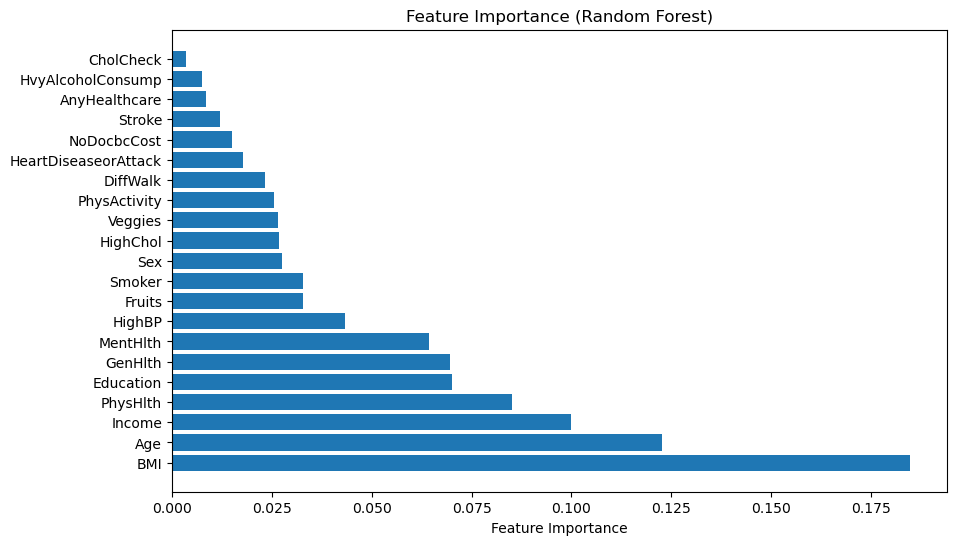

In [19]:
# Step 6: Plot feature importances
features = X_train_fi.columns
indices = np.argsort(feature_importances)[::-1]  # Sort feature importances in descending order

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.barh(range(X_train_fi.shape[1]), feature_importances[indices], align="center")
plt.yticks(range(X_train_fi.shape[1]), features[indices])
plt.xlabel("Feature Importance")
plt.show()

# Correlation Coefficent Heatmap

Text(0.5, 1.0, 'correlation of feature')

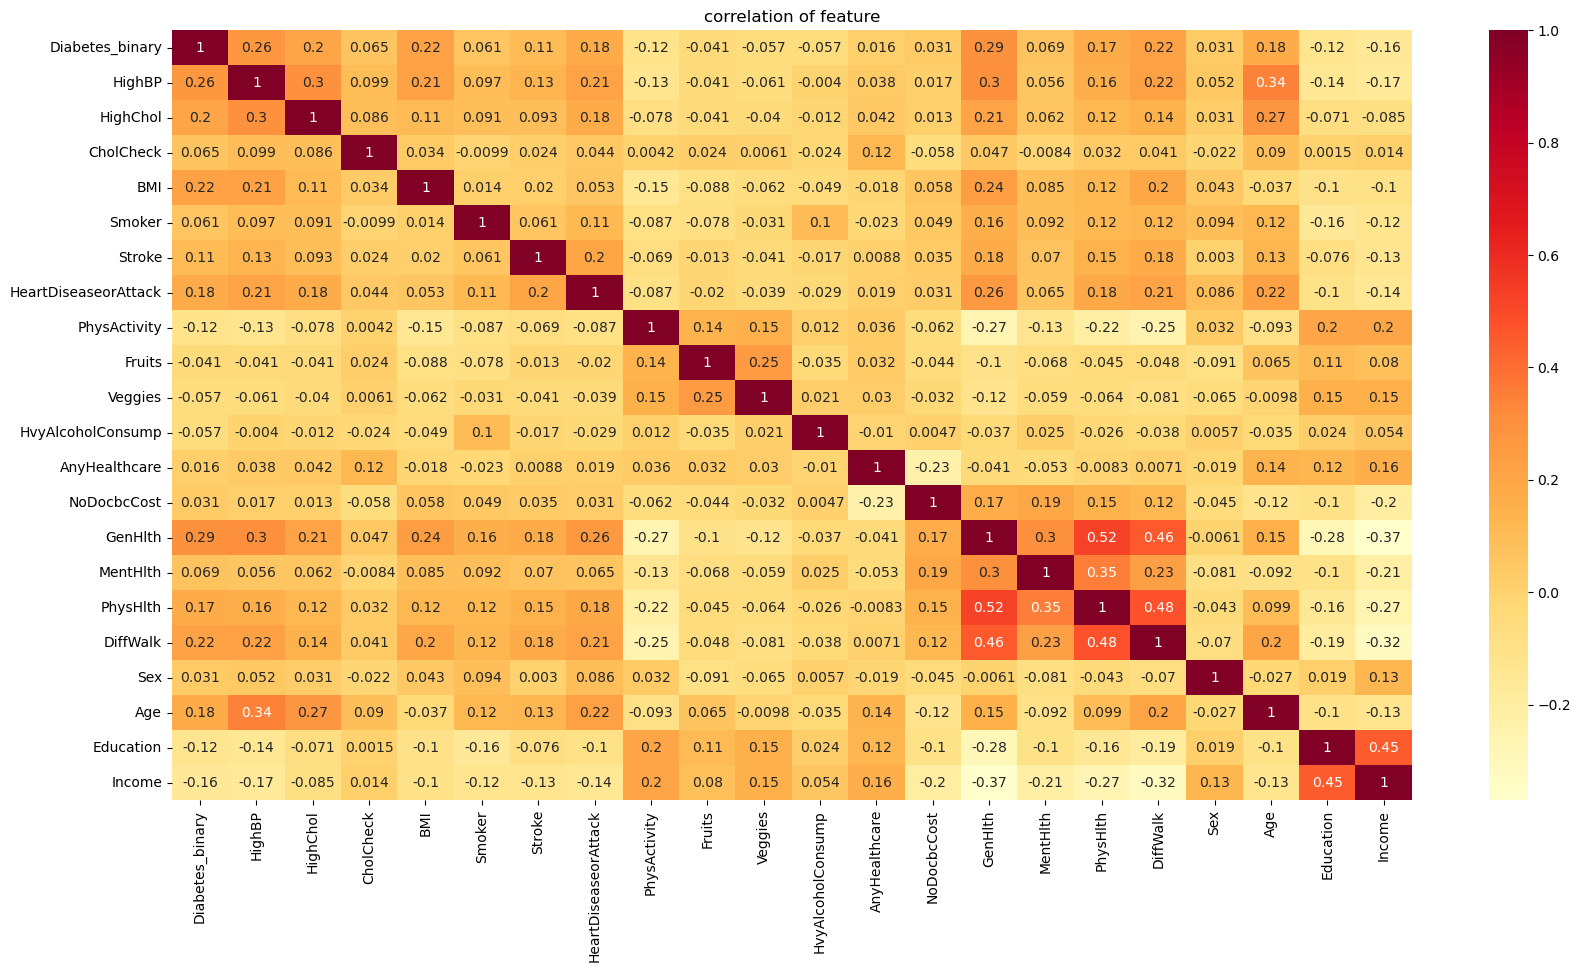

In [22]:
# This is creates the sns library to create a correlation coeff heatmap.
plt.figure(figsize = (20,10))
sns.heatmap(train_data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

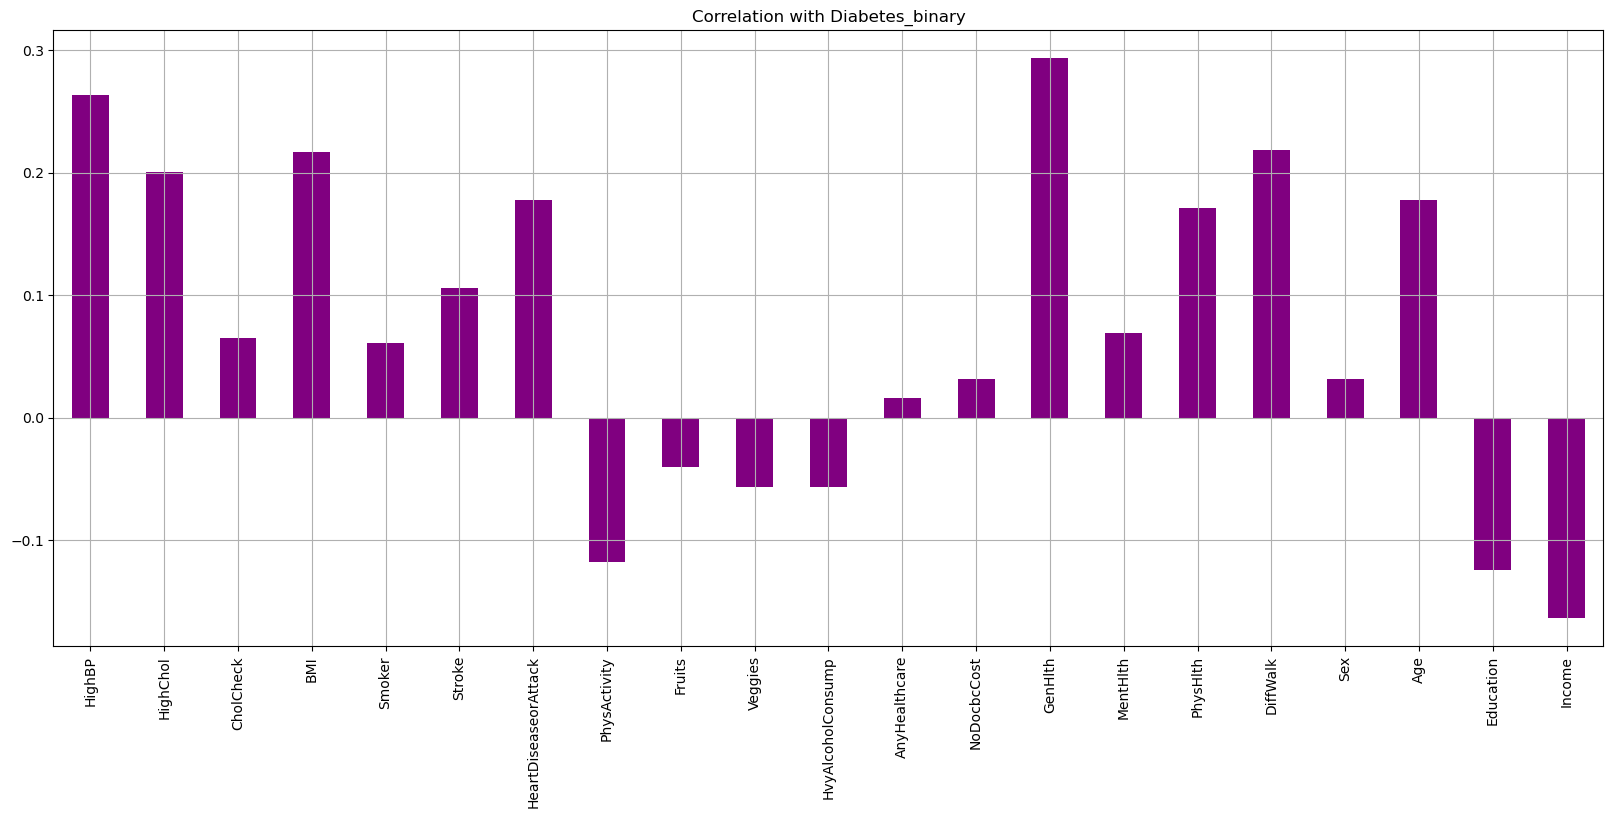

In [24]:
train_data.drop('Diabetes_binary', axis=1).corrwith(train_data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Purple");

# Select Best features using KBest method

In [27]:
#using SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X_train_fi,y_train_fi)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train_fi.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores = f_Scores.sort_values('Score', ascending=False)
f_Scores

,Feature,Score
15,PhysHlth,133424.406534
14,MentHlth,21029.632228
3,BMI,18355.166400
16,DiffWalk,10059.506391
0,HighBP,10029.013935
13,GenHlth,9938.507776
18,Age,9276.141199
6,HeartDiseaseorAttack,7221.975378
1,HighChol,5859.710582
20,Income,4829.816361


In [29]:
# These are the columns that did not show up in the top 10 features in the 3 techniques used to determine best features.
cols_drop = ['CholCheck','Smoker','Stroke','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','Sex']

In [31]:
train_data_filtered = train_data.drop(cols_drop , axis= 1)
test_data_filtered = test_data.drop(cols_drop , axis= 1)

In [33]:
# we are splitting the data
X_train = train_data_filtered.drop('Diabetes_binary', axis=1) # Assuming 'label' is the column with 0 or 1 for diabetes 
y_train = train_data_filtered['Diabetes_binary'] 
X_test = test_data_filtered.drop('Diabetes_binary', axis=1) 
y_test = test_data_filtered['Diabetes_binary']

In [35]:
y_train.value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

In [37]:
y_test.value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

In [39]:

over = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train_over, y_train_over = over.fit_resample(X_train, y_train)
# summarize class distribution
print((y_train_over.value_counts()))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train_under, y_train_under = under.fit_resample(X_train, y_train)
# summarize class distribution
print((y_train_under.value_counts()))

Diabetes_binary
0.0    218334
1.0    218334
Name: count, dtype: int64
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


In [41]:
# scaling the Xtrain data for both under and over sample
from sklearn.preprocessing import StandardScaler
scalar_over = StandardScaler()
X_train_over_scaled = scalar_over.fit_transform(X_train_over)
X_test_over_scaled = scalar_over.fit_transform(X_test)

scalar_under = StandardScaler()
X_train_under_scaled = scalar_under.fit_transform(X_train_under)
X_test_under_scaled = scalar_under.fit_transform(X_test)

# Modeling for oversample data

In [44]:
#Logistic Regression
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train_over_scaled , y_train_over)

# make predictions on test set
y_pred=lg.predict(X_test_over_scaled)

print('Training set score: {:.4f}'.format(lg.score(X_train_over_scaled , y_train_over)))

print('Test set score: {:.4f}'.format(lg.score(X_test_over_scaled, y_test)))


matrix = classification_report(y_test,y_pred )
print(matrix)

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_pred)

print(cm1)

Training set score: 0.7424
Test set score: 0.7449
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74     35346
         1.0       0.74      0.76      0.75     35346

    accuracy                           0.74     70692
   macro avg       0.75      0.74      0.74     70692
weighted avg       0.75      0.74      0.74     70692

[[25710  9636]
 [ 8398 26948]]


In [45]:
#Decision Tree
model = DecisionTreeClassifier( max_depth= 12)
model.fit(X_train_over_scaled , y_train_over)

# make predictions on test set
y_pred=model.predict(X_test_over_scaled)

print('Training set score: {:.4f}'.format(model.score(X_train_over_scaled , y_train_over)))

print('Test set score: {:.4f}'.format(model.score(X_test_over_scaled, y_test)))


matrix = classification_report(y_test,y_pred )
print(matrix)

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_pred)

print(cm1)

Training set score: 0.7742
Test set score: 0.7737
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76     35346
         1.0       0.75      0.82      0.78     35346

    accuracy                           0.77     70692
   macro avg       0.78      0.77      0.77     70692
weighted avg       0.78      0.77      0.77     70692

[[25581  9765]
 [ 6233 29113]]


# Descision Tree is performing much better than the logistic regression

In [49]:
model = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )
model.fit(X_train_over_scaled , y_train_over)

# make predictions on test set
y_pred=model.predict(X_test_over_scaled)

print('Training set score: {:.4f}'.format(model.score(X_train_over_scaled , y_train_over)))

print('Test set score: {:.4f}'.format(model.score(X_test_over_scaled, y_test)))


matrix = classification_report(y_test,y_pred )
print(matrix)

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_pred)

print(cm1)


Training set score: 0.7795
Test set score: 0.7783
              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77     35346
         1.0       0.75      0.82      0.79     35346

    accuracy                           0.78     70692
   macro avg       0.78      0.78      0.78     70692
weighted avg       0.78      0.78      0.78     70692

[[25891  9455]
 [ 6219 29127]]
